In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasets_14872_228180_Admission_Predict (1).csv to datasets_14872_228180_Admission_Predict (1).csv


In [ ]:
admission_df = pd.read_csv('datasets_14872_228180_Admission_Predict (1).csv')

In [ ]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
admission_df.drop('Serial No.', axis=1,inplace = True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [ ]:
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df_university = admission_df.groupby(by= 'University Rating').mean()
df_university 

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9465e59390>,
      dtype=object)

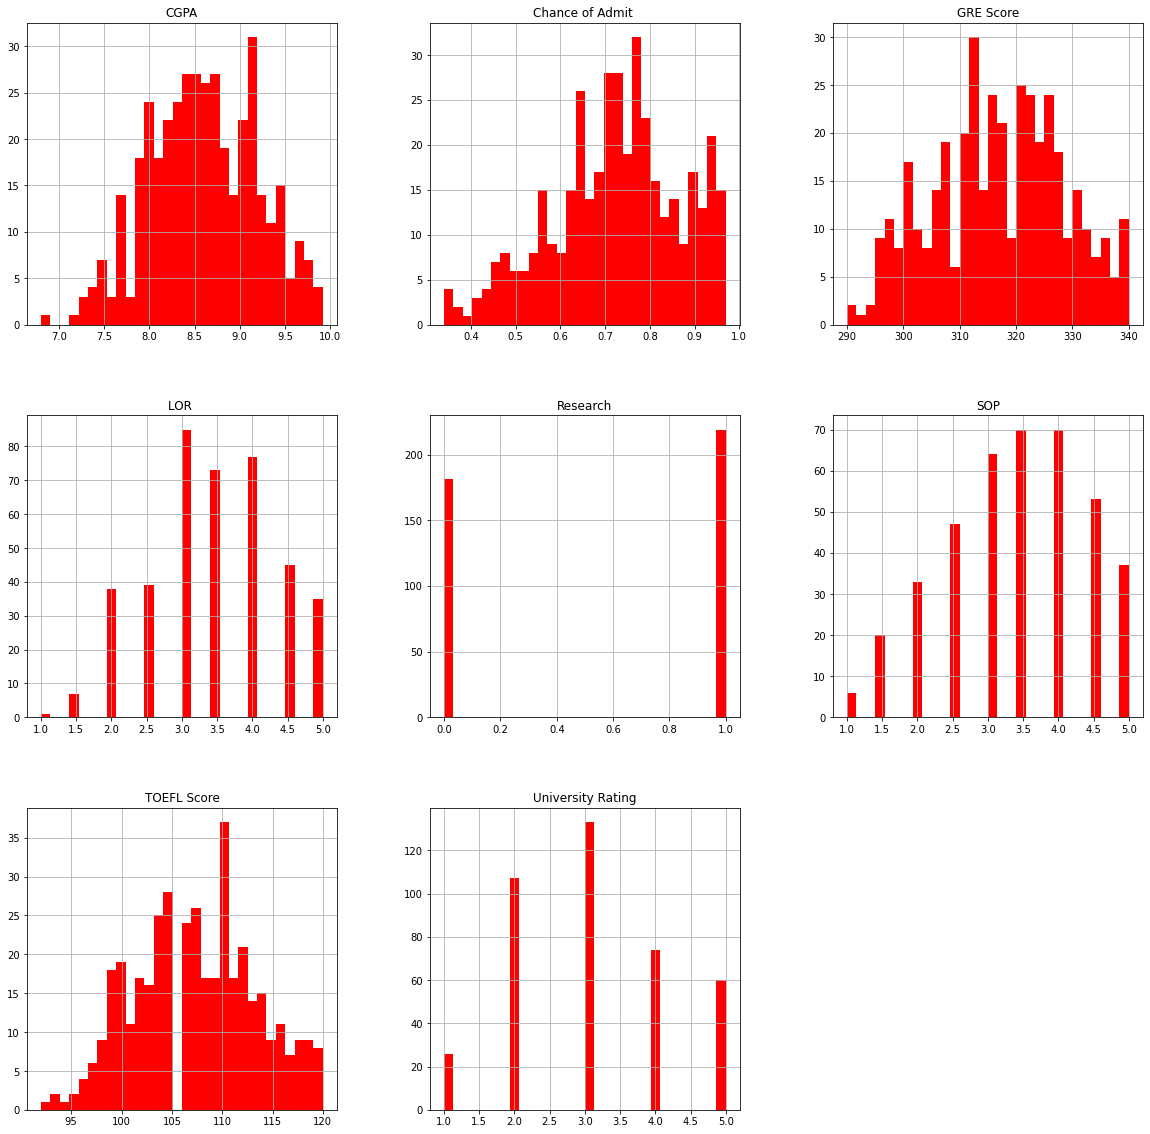

In [ ]:
admission_df.hist(bins = 30 , figsize= (20,20) , color = 'r')

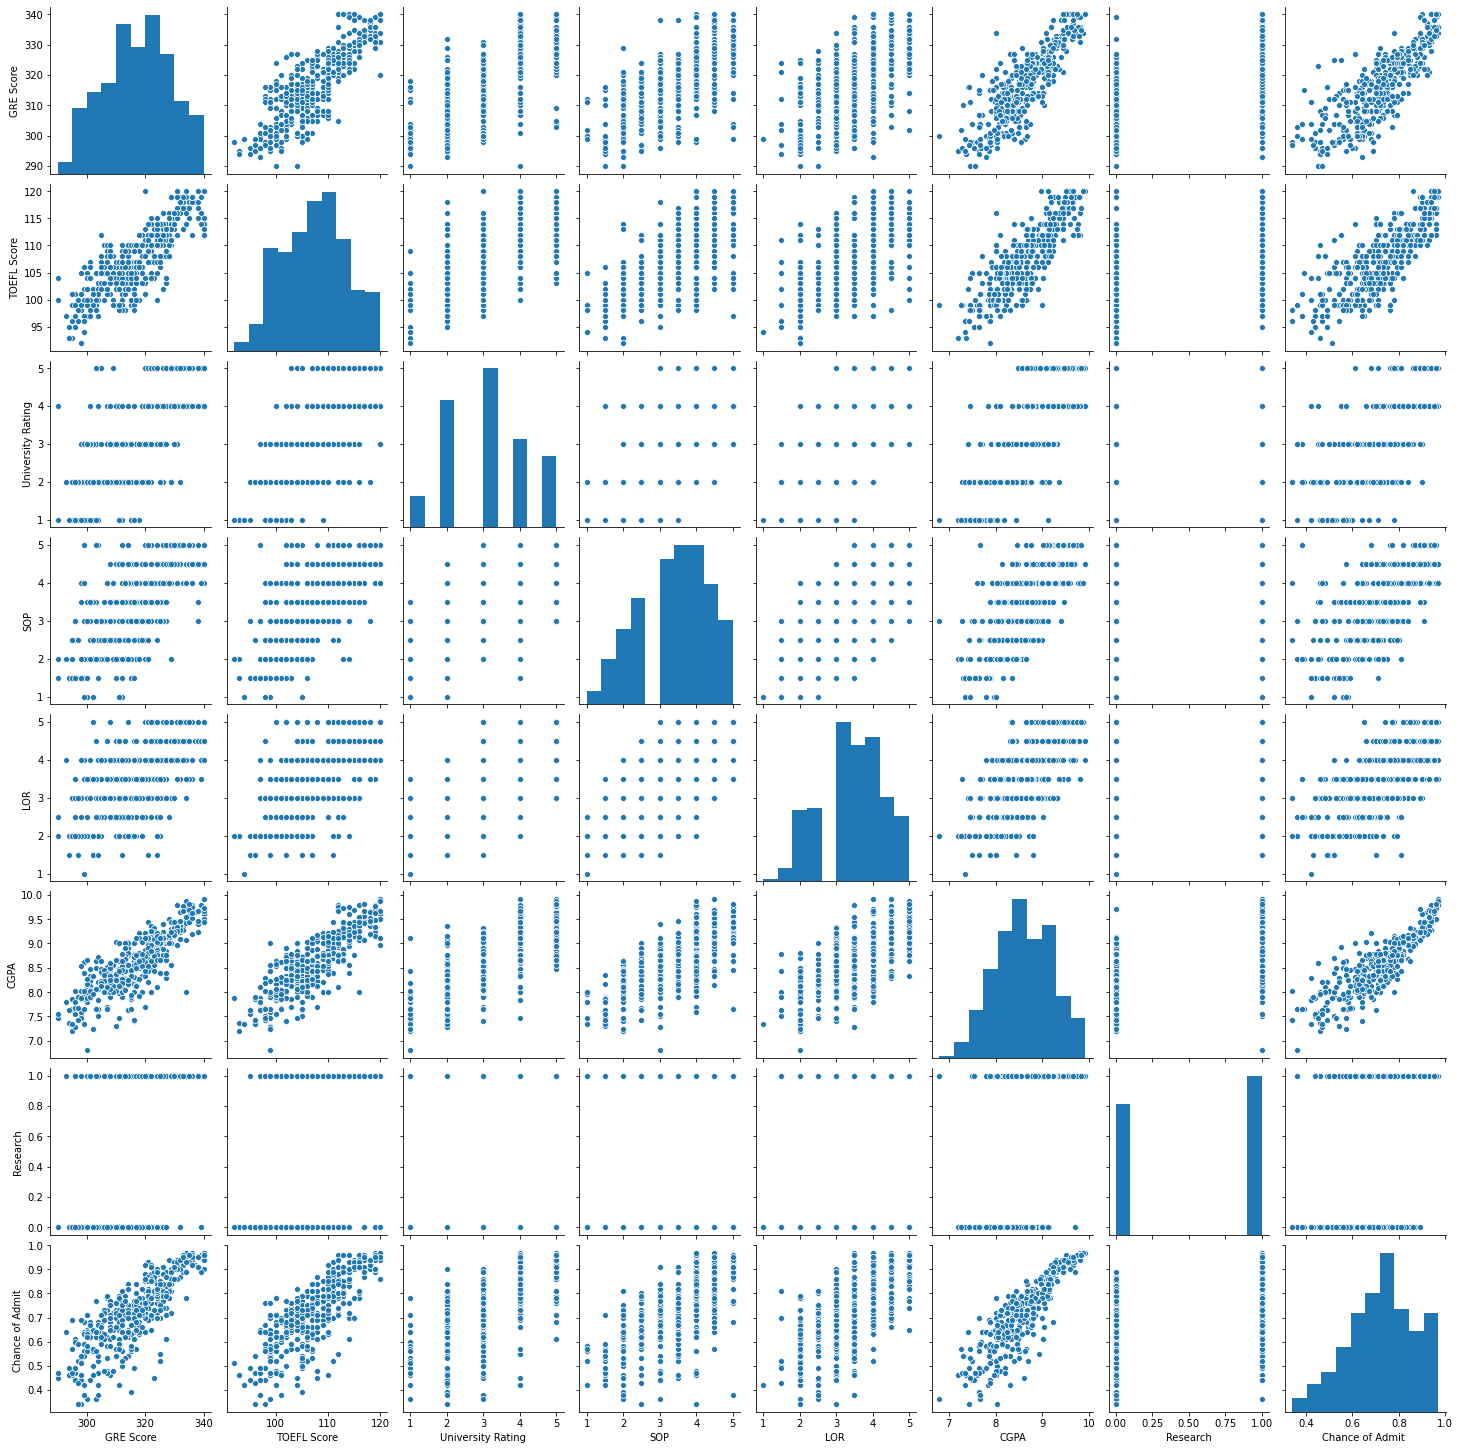

In [ ]:
sns.pairplot(admission_df)

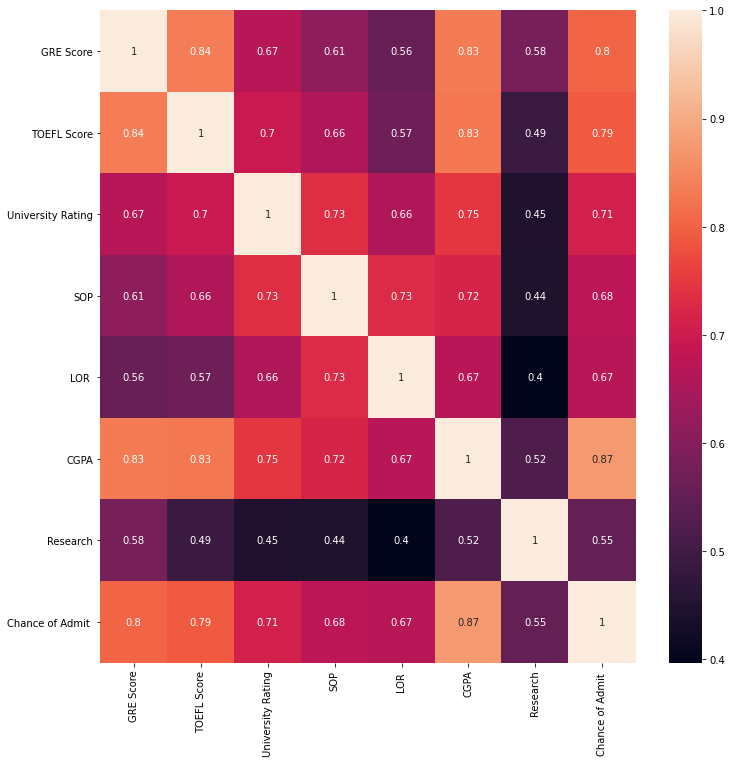

In [ ]:
corr_matrix = admission_df.corr()
plt.figure(figsize= (12,12))
sns.heatmap(corr_matrix,annot= True)
plt.show()

In [ ]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
X = admission_df.drop(columns = ['Chance of Admit '])

In [ ]:
y = admission_df['Chance of Admit ']

In [ ]:
X.shape

(400, 7)

In [ ]:
y.shape

(400,)

In [ ]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
y = y.reshape(-1,1)
y.shape

(400, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
scalar_x = StandardScaler()
X = scalar_x.fit_transform(X)

NameError: ignored

In [ ]:
scalar_y =StandardScaler()
y = scalar_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.15)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , accuracy_score


In [ ]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
accuracy_LinearRegression = LinearRegression_model.score(X_test,y_test)
accuracy_LinearRegression

0.8557193872929324

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense , Activation , Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50 , input_dim =7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse' , optimizer='adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [ ]:
ANN_model.compile(optimizer='Adam', loss = 'mean_squared_error')

In [ ]:
epochs_hist = ANN_model.fit(X_train,y_train , epochs = 100 , batch_size =20)

Epoch 1/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6611
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4041
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3552
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3023
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.3058
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2761
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2836
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2710
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2662
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2671
Epoch 11/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2382
Epoch 12/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2295
Epoch 13/100
17/17 [=================

In [ ]:
result = ANN_model.evaluate(X_test,y_test)
accuracy_ANN = 1 -result
print("Accuracy : {}".format(accuracy_ANN))

2/2 [==============================] - 0s 3ms/step - loss: 0.2123
Accuracy : 0.7877148240804672


In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

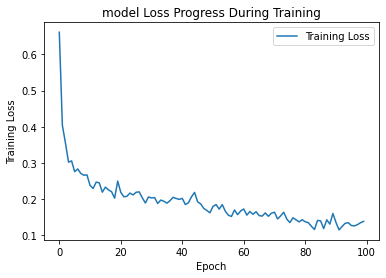

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
accuracy_DecisionTree = DecisionTree_model.score(X_test,y_test)
accuracy_DecisionTree

0.7711021742973307

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators = 100 , max_depth =10)
RandomForest_model.fit(X_train ,y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
accuracy_RandomForest = RandomForest_model.score(X_test,y_test)
accuracy_RandomForest

0.8335185526300363

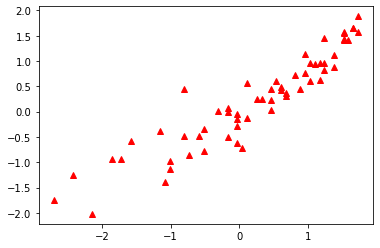

In [ ]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, '^',color = 'r')

In [ ]:
y_predict_orig = scalar_y.inverse_transform(y_predict)
y_test_orig = scalar_y.inverse_transform(y_test)

NameError: ignored

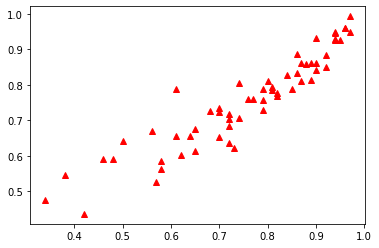

In [ ]:
plt.plot(y_test_orig , y_predict_orig,'^', color ='r')

In [ ]:
k = X_test.shape[1]
n =len(X_test)
n

60

In [ ]:
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig,y_predict_orig)),'3f'))
MSE = mean_squared_error(y_test_orig,y_predict_orig)
MAE = mean_absolute_error(y_test_orig,y_predict_orig)
r2 = r2_score(y_test_orig,y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
print('RMSE =',RMSE,'\nMSE =',MSE ,'\nMAE =',MAE,'\nR2 =',r2,'\nAdjusted R2 =',adj_r2)

RMSE = 0.060229 
MSE = 0.0036275352270394717 
MAE = 0.04343470388463797 
R2 = 0.8557193872929325 
Adjusted R2 = 0.8362969971208273
